# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [3]:
def apply_svd_custom(X_train, X_test, n_components):
    X_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_mean
    X_test_centered = X_test - X_mean

    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / (X_train_centered.shape[0] - 1)

    eig_values, eig_vectors = np.linalg.eigh(covariance_matrix)

    sorted_indices = np.argsort(eig_values)[::-1]
    eig_vectors = eig_vectors[:, sorted_indices]

    eig_vectors_reduced = eig_vectors[:, :n_components]

    X_train_reduced = np.dot(X_train_centered, eig_vectors_reduced)
    X_test_reduced = np.dot(X_test_centered, eig_vectors_reduced)

    return X_train_reduced, X_test_reduced, eig_vectors_reduced

## Part 3: Train Logistic Regression and Measure Performance

In [4]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [5]:
svd_components = [500, 400, 50, 20, 5]  # Updated component list

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets using apply_svd_custom
    X_train_svd, X_test_svd, _ = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Append the results (n_components, accuracy, training_time) to the results list
    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })

    # Output the results for this run
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

# After the loop, print all results
for result in results:
    print(f"Components: {result['n_components']}, Accuracy: {result['accuracy']:.4f}, Time: {result['training_time']:.4f} seconds")




Training models with different levels of SVD preprocessing...
Applying custom SVD with 500 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9205, Training time: 348.4430 seconds
Applying custom SVD with 400 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 400, Accuracy: 0.9196, Training time: 285.2405 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9080, Training time: 14.7774 seconds
Applying custom SVD with 20 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8784, Training time: 3.5588 seconds
Applying custom SVD with 5 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 5, Accuracy: 0.6796, Training time: 0.7777 seconds
Components: 500, Accuracy: 0.9205, Time: 348.4430 seconds
Components: 400, Accuracy: 0.9196, Time: 285.2405 seconds
Components: 50, Accuracy: 0.9080, Time: 14.7774 seconds
Components: 20, Accuracy: 0.8784, Time: 3.5588 seconds
Components: 5, Accuracy: 0.6796, Time: 0.7777 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


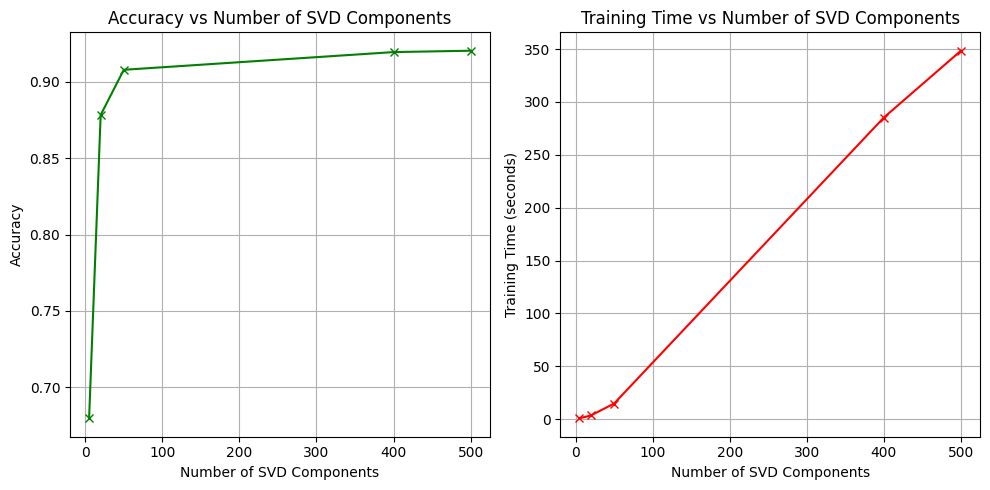

In [7]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
results = [
    {'n_components': 500, 'accuracy': 0.9205, 'training_time': 348.4430},
    {'n_components': 400, 'accuracy': 0.9196, 'training_time': 285.2405},
    {'n_components': 50,  'accuracy': 0.9080, 'training_time': 14.7774},
    {'n_components': 20,  'accuracy': 0.8784, 'training_time': 3.5588},
    {'n_components': 5,   'accuracy': 0.6796, 'training_time': 0.7777}
]

# Extract the number of components, accuracy, and training time from the results
components = [result['n_components'] for result in results]
accuracies = [result['accuracy'] for result in results]
training_times = [result['training_time'] for result in results]

# Now create the plots
import matplotlib.pyplot as plt

# Plot accuracy vs number of components
plt.figure(figsize=(10, 5))

# Plot Accuracy vs Number of SVD Components
plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='x', linestyle='-', color='green')
plt.title('Accuracy vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Training Time vs Number of SVD Components
plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='x', linestyle='-', color='red')
plt.title('Training Time vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

## Part 6: Analyze / Conclusion

YOUR ANSWER:

In [8]:
The plots reveals a clear trade-off between accuracy and training time as the number of SVD
 components increases. Initially, accuracy improves significantly from 0.6796 (with 5 components)
  to around 0.9205 (with 500 components), but after 50 components, the gains become marginal.
  Conversely, training time increases sharply, from less than a second with 5 components to
  over 348 seconds with 500 components. An optimal balance between accuracy and efficiency
  appears to be around 50 to 100 components, where accuracy is high (above 0.9080) and training
   time remains manageable. Beyond this point, the accuracy gains diminish while the computational
    cost rises exponentially, suggesting that for most practical applications, sticking to
    50-100 components would provide a good balance between performance and time.

SyntaxError: invalid syntax (<ipython-input-8-00dd0a10699c>, line 1)